In [67]:
import matplotlib.pyplot as plt
from scipy.spatial.distance import euclidean
from itertools import permutations

In [68]:
origin = (0, 0)
destin = (4, 4)
address = [(2, 1), (2, 2), (8, 3), (5, 3)]

In [69]:
def print_route(route):
    route_size = len(route)
    distance_traveled = 0

    for i in range(route_size):
        x, y = route[i]
        color = "black"

        if i == 0:
            color = "red"
        elif i == route_size - 1:
            color = "green"

        plt.scatter(x, y, color=color)

        if i < route_size - 1:
            x1, y1 = route[i+1]

            dx = x1 - x
            dy = y1 - y

            plt.arrow(x, y, dx, dy, color="black", head_width=0.1)

            distance_traveled = distance_traveled + euclidean(route[i], route[i+1])

    plt.title(f"Route with a distance of {round(distance_traveled, 2)}")
    plt.show()

In [70]:
def calculate_route_distance(route):
    distance_traveled = 0
    route_size = len(route)
    
    for i in range(route_size):
        if i < route_size - 1:
            distance_traveled = distance_traveled + euclidean(route[i], route[i+1])
    
    return distance_traveled

In [71]:
def brute_force(origin, destin, address):
    min_distance = float("inf")
    min_route = None

    for perm in permutations(address):
        route = [origin] + list(perm) + [destin]
        distance_traveled = calculate_route_distance(route)

        if distance_traveled < min_distance:
            min_distance = distance_traveled
            min_route = route

    return min_route, min_distance

In [72]:
min_route, min_distance = brute_force(origin, destin, address)

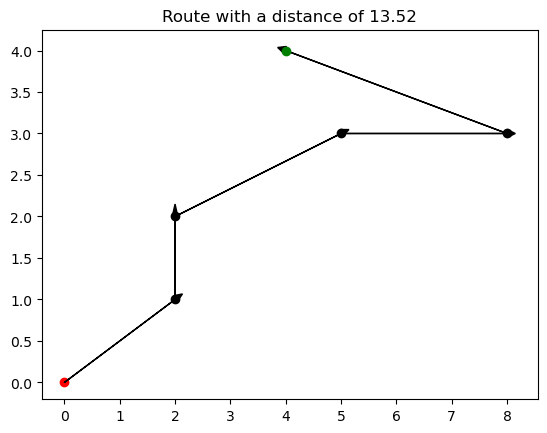

In [73]:
print_route(min_route)

In [74]:
def nearest_neighbor(origin, destin, address):
    currenty_point = origin
    rest_address = address.copy()

    distance_traveled = 0
    min_route = [currenty_point]

    while rest_address:
        min_distance = float("inf")
        next_point = None

        for addrss in rest_address:
            dist = euclidean(currenty_point, addrss)
            if dist < min_distance:
                min_distance = dist
                next_point = addrss

        rest_address.remove(next_point)

        min_route.append(next_point)

        distance_traveled = distance_traveled + min_distance

        currenty_point = next_point

    min_route.append(destin)
    distance_traveled = distance_traveled + euclidean(currenty_point, destin)

    return min_route, distance_traveled

In [76]:
min_route, min_dist = nearest_neighbor(origin, destin, address)

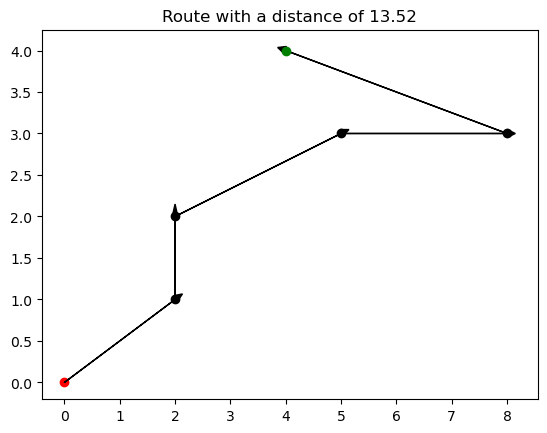

In [77]:
print_route(min_route)